In [2]:
import os
os.getcwd()

'/Users/sheldon/Documents/test/ds-ai-ml/ML'

In [3]:
import numpy as np
import pandas as pd

# Linear Regression

In [15]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
df.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [22]:
# 房间数与房价

x = df[['RM']].values
y = df['MEDV'].values
x, y

(array([[6.575],
        [6.421],
        [7.185],
        [6.998],
        [7.147],
        [6.43 ],
        [6.012],
        [6.172],
        [5.631],
        [6.004],
        [6.377],
        [6.009],
        [5.889],
        [5.949],
        [6.096],
        [5.834],
        [5.935],
        [5.99 ],
        [5.456],
        [5.727],
        [5.57 ],
        [5.965],
        [6.142],
        [5.813],
        [5.924],
        [5.599],
        [5.813],
        [6.047],
        [6.495],
        [6.674],
        [5.713],
        [6.072],
        [5.95 ],
        [5.701],
        [6.096],
        [5.933],
        [5.841],
        [5.85 ],
        [5.966],
        [6.595],
        [7.024],
        [6.77 ],
        [6.169],
        [6.211],
        [6.069],
        [5.682],
        [5.786],
        [6.03 ],
        [5.399],
        [5.602],
        [5.963],
        [6.115],
        [6.511],
        [5.998],
        [5.888],
        [7.249],
        [6.383],
        [6.816],
        [6.145

In [23]:
x.shape, y.shape

((506, 1), (506,))

In [26]:
# standardization

from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(x)
y_std = StandardScaler().fit_transform(y[:, np.newaxis]).flatten() # 标准化只能对二维数组进行操作
y_std.shape

(506,)

trained
Slope:  0.695
Intercept: -4.88e-16


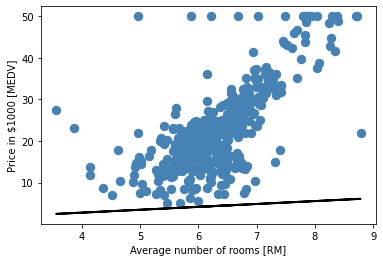

In [35]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(x_std, y_std)
print("trained")

def lin_regplot(x, y, model):
    plt.scatter(x, y, c='steelblue', s=70)
    plt.plot(x, model.predict(x), c='black', lw=2)
    return

y_pred = slr.predict(x)

print(f"Slope: {slr.coef_[0]: {0}.{3}}")
print(f"Intercept: {slr.intercept_: {0}.{3}}")

lin_regplot(x, y, slr)
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000 [MEDV]")
plt.show()

# Classification

## Logistic regression

iris flower dataset: https://www.kaggle.com/arshid/iris-flower-dataset

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# data observation

X = df.iloc[:, 2:4].values # there are total 4 vectors here, but vector selection is needed to simplify model
y = df.iloc[:, 4].values

print(X[:5])
print(X.shape)

print(y[:5])
print(len(y))
print(np.unique(y))

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
(150, 2)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
150
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
# transform flower name to int

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_i = le.fit_transform(y)
print(np.unique(y_i))

y_i[:50], y_i[50:100], y_i[-50:]

[0 1 2]


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]))

In [8]:
# split testing and training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_i, test_size=0.3, random_state=1, stratify=y  # 固化随机状态，按已有类别进行分割，每个类别数量均衡
)

len(y_train), len(y_test)

for t in np.unique(y_train):
    print(t, list(y_train).count(t))

0 35
1 35
2 35


In [9]:
# standardization: 均值为零，标准差为 1 的正态分布
# 标准化和归一化会提高机器学习的效率

from sklearn.preprocessing import StandardScaler

print(X_train[0:10])
sc = StandardScaler()
sc.fit(X_train) # make the scaler

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_test_std[0:10]

[[1.4 0.2]
 [1.7 0.2]
 [5.3 2.3]
 [5.7 2.1]
 [1.2 0.2]
 [5.6 2.4]
 [6.6 2.1]
 [1.2 0.2]
 [5.8 1.6]
 [4.6 1.3]]


array([[ 0.89820289,  1.44465434],
       [-1.16537974, -1.04204575],
       [-1.33269725, -1.17292471],
       [ 0.39625036,  0.65938063],
       [ 0.34047786,  0.26674377],
       [ 0.11738784,  0.13586482],
       [ 1.12129291,  0.79025958],
       [ 0.39625036,  0.39762272],
       [ 0.84243039,  0.92113853],
       [-1.38846976, -1.04204575]])

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, random_state=1) # 正则化

# trainning
lr.fit(X_train_std, y_train)

LogisticRegression(C=100, random_state=1)

<ipython-input-33-0910e86aab04>:40: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(


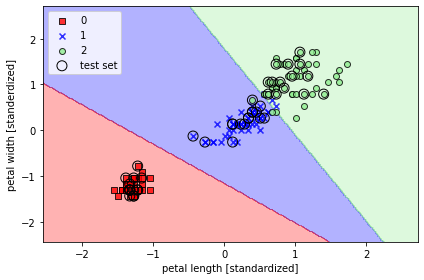

In [33]:
# plot

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )


    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y == cl, 0],
            y = X[y == cl, 1],
            alpha = 0.8,
            c = colors[idx],
            marker = markers[idx],
            label = cl,
            edgecolor = "black",
        )
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c = '',
            edgecolor = 'black',
            alpha = 2,
            linewidth = 1,
            marker = 'o',
            s = 100,
            label = 'test set'
        )
    
    
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(
    X = X_combined_std,
    y = y_combined,
    classifier = lr,
    test_idx = range(105, 150)
)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standerdized]')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()